In [1]:
#!/usr/bin/env python

'''
DESCRIPTION
-----------
    Encoding information

RETURN
------
    {EXPERIMENT}_enc.png : png file
        graph


EXPORTED FILE(s) LOCATION
-------------------------
    ./models/NN/{EXPERIMENT}/{EXPERIMENT}_enc.png
'''

# importing default libraries
import os, argparse, sys
# sys.path.append('./')
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)
# importing scripts in scripts folder
from scripts import settings as srp

scripts/settings.py - PATHS IMPORTED!!!


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

TINY_SIZE = 8
SMALL_SIZE = 10
NORMAL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=12)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=TINY_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=TINY_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=NORMAL_SIZE)    # legend fontsize
plt.rc('legend', title_fontsize=NORMAL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

## MELANOMA

In [3]:
srp.define_folder('./reports/encoding/exper_melanoma')

'./reports/encoding/exper_melanoma/'

In [4]:
df_query = pd.read_pickle('./data/processed/exper_melanoma/query_log1p.pck')
df_query

,a2m,abcb11,abcb4,abcc2,abcc8,abhd5,abi2,abl1,abl2,ablim1,...,zbp1,zbtb17,zfp36l1,zfp36l2,zfyve16,zfyve9,zmat3,znf274,zyx,cell_type
0,0.000000,0.0,0.0,0.000000,0.0,3.189653,3.305054,0.000000,2.261763,0.000000,...,1.226712,0.000000,5.301064,2.113843,3.305420,3.702536,1.202972,0.000000,3.349202,Neg.cell
1,7.886006,0.0,0.0,0.000000,0.0,4.069710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.393992,0.000000,0.000000,0.000000,3.551914,0.000000,0.000000,Neg.cell
2,6.300162,0.0,0.0,0.000000,0.0,0.000000,3.378611,0.000000,3.527536,0.000000,...,0.000000,0.000000,2.507157,0.000000,2.512846,0.000000,2.758109,0.000000,0.000000,Neg.cell
3,6.989400,0.0,0.0,0.000000,0.0,0.000000,3.117950,3.971800,1.640937,0.000000,...,0.000000,0.000000,3.159975,3.823192,2.022871,0.000000,0.000000,0.000000,0.000000,Neg.cell
4,0.000000,0.0,0.0,4.033887,0.0,0.576613,3.353756,0.000000,1.196948,0.000000,...,0.000000,0.000000,5.894293,3.120160,0.000000,0.000000,0.783902,3.655581,0.000000,Neg.cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.634762,0.000000,2.017566,3.684118,...,0.000000,5.912908,4.888317,6.408446,0.631272,0.000000,3.038792,0.000000,0.000000,T.CD8
3408,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.316408,0.000000,1.897620,0.000000,...,0.000000,0.000000,3.929863,5.199325,0.000000,0.000000,0.000000,0.000000,0.000000,T.CD8
3409,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,2.766319,0.000000,4.506785,...,0.000000,4.933322,4.286479,5.002267,0.000000,0.000000,0.000000,0.000000,5.598422,T.CD8
3410,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.759377,0.000000,1.335001,0.000000,...,2.755570,0.000000,6.399194,5.954256,0.000000,0.000000,2.319442,0.000000,4.051785,T.CD8


In [19]:
X = df_query.iloc[:, :-1].values
y_ground_truth = df_query.iloc[:, -1:]

print('shape of feature and traget dataset, feature dataset, {0}, target column {1}'.format(X.shape, y_ground_truth.shape))

shape of feature and traget dataset, feature dataset, (3412, 2877), target column (3412, 1)


Loaded model!! ./models/NN/exper_melanoma/model_a1_reference_log1p_train_test_split_trained.h5
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 2877)]            0         
_________________________________________________________________
layer1 (Dense)               (None, 93)                267654    
Total params: 267,654
Trainable params: 267,654
Non-trainable params: 0
_________________________________________________________________
a1
Loaded model!! ./models/NN/exper_melanoma/model_a2_reference_log1p_train_test_split_trained.h5
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 2877)]            0         
_________________________________________________________________
layer1 (Dense)               (None, 93)

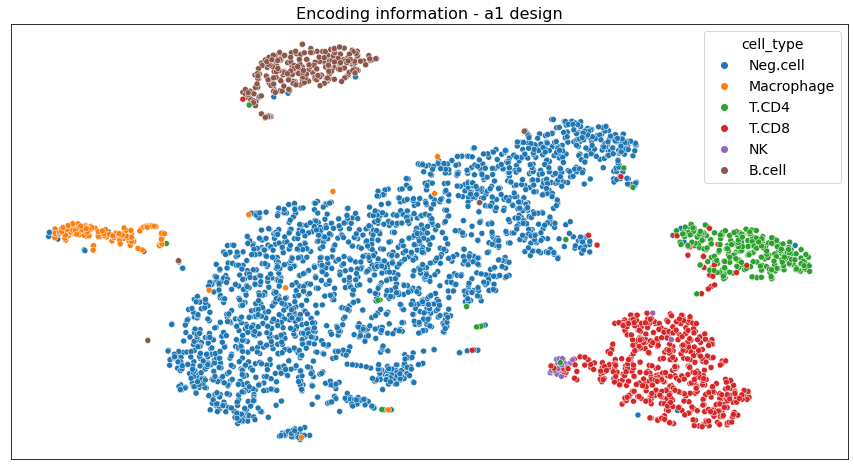

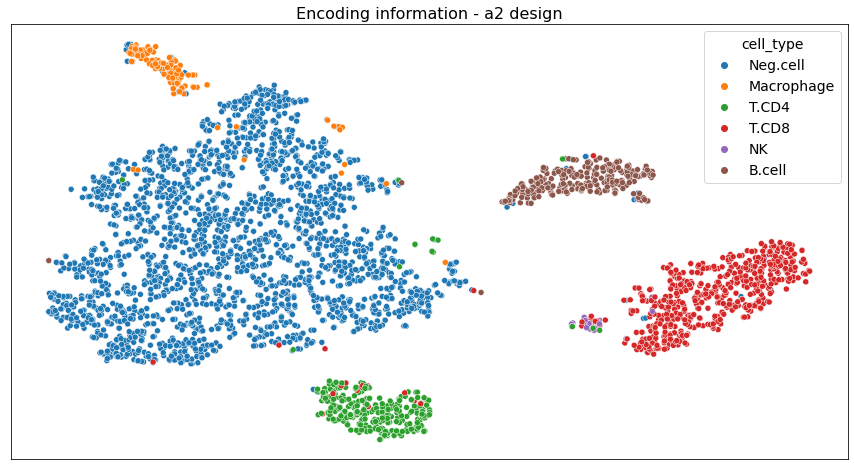

In [23]:
for i_design in ['a1','a2']:
#     design = 'a1'
    _, model_encoding = srp.loading_model('./models/NN/exper_melanoma/model_'+i_design+'_reference_log1p_train_test_split_trained.h5', -1)
    model_encoding.summary()
    print(i_design)

    encoding = model_encoding.predict(X)
    tsne = TSNE().fit_transform(encoding)

    df_encoding_tsne = pd.concat([pd.DataFrame(tsne, columns=['tsne1', 'tsne2']), y_ground_truth], axis=1)

    plt.figure(figsize=(15,8))
    sns.scatterplot(data=df_encoding_tsne, x='tsne1', y='tsne2', hue='cell_type')
    plt.title('Encoding information - '+i_design+' design')
    # plt.axis('off');
    # plt.xticks([])
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig('./reports/encoding/exper_melanoma/mel_enc_query_'+i_design+'.png', dpi=300, bbox_inches = 'tight')

## IMMUNE

In [26]:
srp.define_folder('./reports/encoding/exper_immune')

'./reports/encoding/exper_immune/'

In [27]:
df_immune = pd.read_pickle('./data/processed/exper_immune/exper_immune_raw_sw_log1p.pck')
print(df_immune.shape)
sort_genes = sorted(df_immune.columns[:-1])
sort_genes.extend(df_immune.columns[-1:])
df_immune = df_immune[sort_genes]
df_immune

X = df_immune.iloc[:, :-1].values
y = df_immune.iloc[:, -1:]
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(y.values).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=91, stratify=y_ohe)

(25604, 2090)


Loaded model!! ./models/NN/exper_immune/model_a1_exper_immune_raw_sw_log1p_train_test_split_trained.h5
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 2089)]            0         
_________________________________________________________________
layer1 (Dense)               (None, 93)                194370    
Total params: 194,370
Trainable params: 194,370
Non-trainable params: 0
_________________________________________________________________
a1
Loaded model!! ./models/NN/exper_immune/model_a2_exper_immune_raw_sw_log1p_train_test_split_trained.h5
Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 2089)]            0         
_________________________________________________________________
layer1 (Dense)         

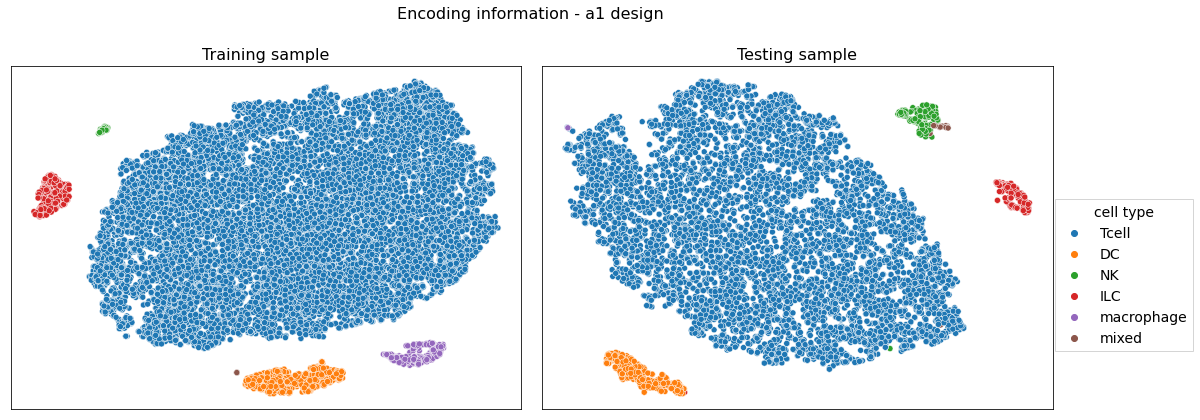

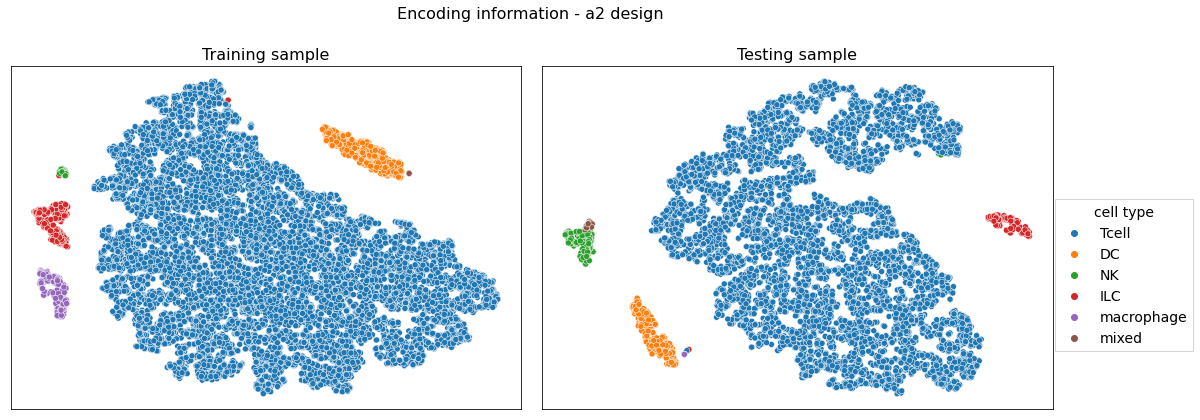

In [28]:
for i_design in ['a1','a2']:
    
    _, model_encoding = srp.loading_model('./models/NN/exper_immune/model_'+i_design+'_exper_immune_raw_sw_log1p_train_test_split_trained.h5', -1)
    model_encoding.summary()
    print(i_design)
    
    encoding_train = model_encoding.predict(X_train)
    encoding_test = model_encoding.predict(X_test)
    
    tsne_train = TSNE().fit_transform(encoding_train)
    tsne_test = TSNE().fit_transform(encoding_test)
    
    df_encoding_train_tsne = pd.concat([pd.DataFrame(tsne_train, columns=['tsne1', 'tsne2'])
                                        , pd.DataFrame(y_train.values, columns=['cell_type'])], axis=1)
    df_encoding_test_tsne = pd.concat([pd.DataFrame(tsne_test, columns=['tsne1', 'tsne2'])
                                       , pd.DataFrame(y_test.values, columns=['cell_type'])], axis=1)
    
    fig, axes= plt.subplots(ncols=2, figsize=(15,6))
    sns.scatterplot(x='tsne1', y='tsne2', data=df_encoding_train_tsne, hue='cell_type', ax=axes[0]);
    axes[0].set_title('Training sample')
    sns.scatterplot(x='tsne1', y='tsne2', data=df_encoding_test_tsne, hue='cell_type', ax=axes[1]);
    axes[1].set_title('Testing sample');

    axes[0].get_legend().remove()
    axes[1].get_legend().remove()

    axes[0].axes.xaxis.set_visible(False)
    axes[0].axes.yaxis.set_visible(False)
    axes[1].axes.xaxis.set_visible(False)
    axes[1].axes.yaxis.set_visible(False)

    # bbox_to_anchor=(.5, 1.1) ncol=6
    handles, labels = axes[0].get_legend_handles_labels()
    lgd = fig.legend(handles, labels, loc='upper center', title='cell type', bbox_to_anchor=(1.05, 0.55), fancybox=False, shadow=False)
    fig.suptitle('Encoding information - '+i_design+' design')
    fig.tight_layout()

    # fig.savefig('encoding.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./reports/encoding/exper_immune/immune_enc_'+i_design+'.png', dpi=300, bbox_inches = 'tight')

## MOUSE

In [29]:
loc_mouse = srp.define_folder('./reports/encoding/exper_mouse')
loc_mouse

'./reports/encoding/exper_mouse/'

In [30]:
df_cell_detail = pd.read_pickle('./data/processed/exper_mouse/mouse_retrieval_sw_StandardScaler.pck')
df_cell_detail['cell_type_detail'] = df_cell_detail['cell_type']
df_cell_detail['cell_type'] = df_cell_detail['cell_type'].str.split('_', expand=True)[0]

df_cell_detail.loc[df_cell_detail.index.isin(np.where(df_cell_detail['cell_type'].isin(['E12', 'E14', 'adult']))[0]), 'cell_type'] = 'HSC'
df_cell_detail.loc[df_cell_detail.index.isin(np.where(df_cell_detail['cell_type'].isin(['celebral-cortex', 'CNS', 'brain']))[0]), 'cell_type'] = 'neuron'
df_cell_detail = df_cell_detail.loc[df_cell_detail['cell_type'].isin(['HSC','4cell','ICM','spleen','8cell','neuron','zygote','2cell','ESC'])].reset_index(drop=True)
print(df_cell_detail.shape)

(13645, 1647)


In [37]:
df = pd.read_pickle('./data/processed/exper_mouse/mouse_retrieval_cv_sw_StandardScaler.pck')
# print(df.shape)
sort_genes = sorted(df.columns[:-1])
sort_genes.extend(df.columns[-1:])
df = df[sort_genes]
# print(df.head())

X = df.iloc[:, :-1].values
y_ground_truth = df.iloc[:, -1:]

print('shape of feature and traget dataset, feature dataset, {0}, target column {1}'.format(X.shape, y_ground_truth.shape))

shape of feature and traget dataset, feature dataset, (13645, 1645), target column (13645, 1)


Loaded model!! ./models/NN/exper_mouse/model_a1_mouse_training_sw_StandardScaler_train_test_split_trained.h5
Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 1645)]            0         
_________________________________________________________________
layer1 (Dense)               (None, 92)                151432    
Total params: 151,432
Trainable params: 151,432
Non-trainable params: 0
_________________________________________________________________
a1
Loaded model!! ./models/NN/exper_mouse/model_a2_mouse_training_sw_StandardScaler_train_test_split_trained.h5
Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 1645)]            0         
_________________________________________________________________
layer1 (Den

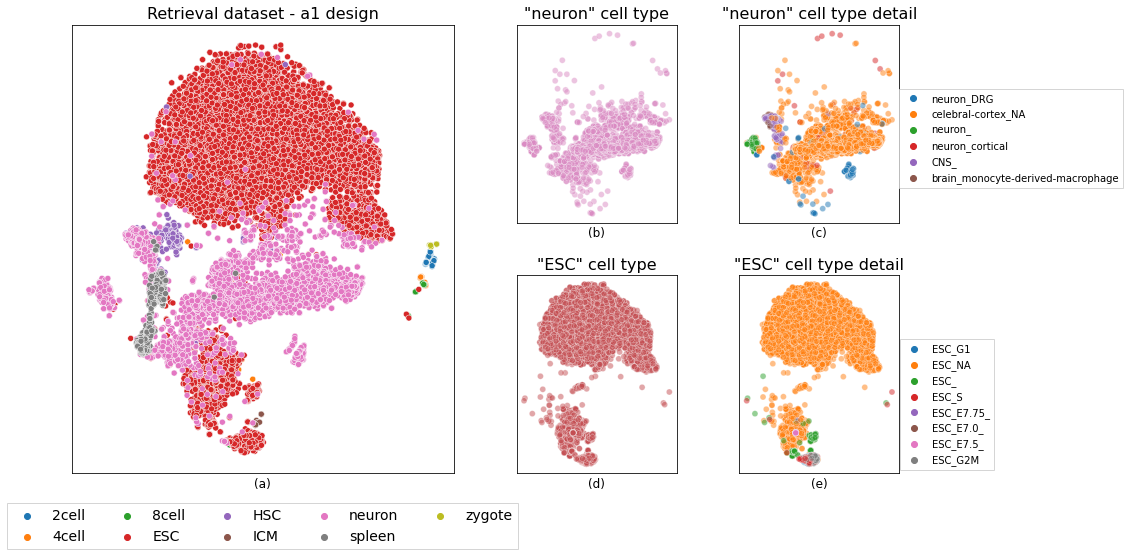

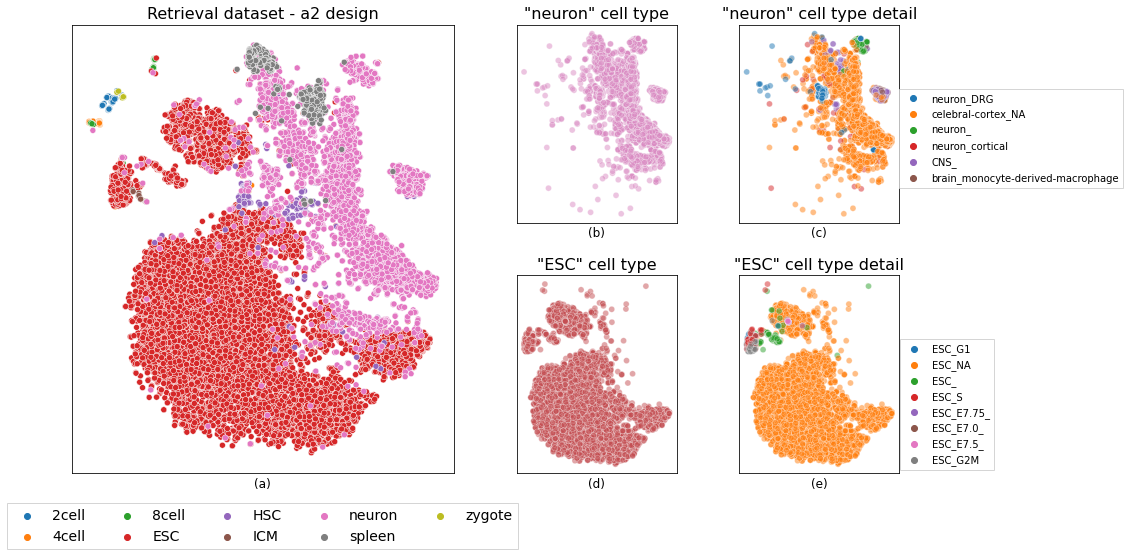

In [36]:
# design='a1'
for i_design in ['a1','a2']:
    _, model_encoding = srp.loading_model('./models/NN/exper_mouse/model_'+i_design+'_mouse_training_sw_StandardScaler_train_test_split_trained.h5', -1)
    model_encoding.summary()
    print(i_design)
    
    encoding = model_encoding.predict(X)
    tsne = TSNE().fit_transform(encoding)

    df_encoding_tsne = pd.concat([pd.DataFrame(tsne, columns=['tsne1', 'tsne2']), y_ground_truth], axis=1)
    sorter_index=dict(zip(sorted(set(df['cell_type'])), range(len(set(df['cell_type']))) ))
    df_encoding_tsne['order'] = df_encoding_tsne['cell_type'].map(sorter_index)
    df_encoding_tsne['cell_type_detail'] = df_cell_detail['cell_type_detail']
    df_encoding_tsne
    
    fig = plt.figure(figsize=(16,8))

    ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
    ax2 = plt.subplot2grid((2, 4), (0, 2), colspan=1)
    ax3 = plt.subplot2grid((2, 4), (0, 3), colspan=1)
    ax4 = plt.subplot2grid((2, 4), (1, 2), colspan=1)
    ax5 = plt.subplot2grid((2, 4), (1, 3), colspan=1)

    sns.scatterplot(data=df_encoding_tsne.sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='cell_type', ax=ax1, alpha=1., marker="o")
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=False, shadow=False, ncol=5);

    # axes.xaxis.label.set_visible(False)
    sns.scatterplot(data=df_encoding_tsne.loc[df_encoding_tsne['cell_type'].isin(['neuron'])].sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='cell_type', ax=ax2, alpha=.5, marker="o", palette=['#DA8BC3'])
    # ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=False, shadow=False, ncol=6);

    sns.scatterplot(data=df_encoding_tsne.loc[df_encoding_tsne['cell_type'].isin(['neuron'])].sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='cell_type_detail', ax=ax3, alpha=.5, marker="o")
    ax3.legend(loc='upper center', bbox_to_anchor=(1.7, 0.7), fancybox=False, shadow=False, ncol=1, fontsize=SMALL_SIZE)

    sns.scatterplot(data=df_encoding_tsne.loc[df_encoding_tsne['cell_type'].isin(['ESC'])].sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='cell_type', ax=ax4, alpha=.5, marker="o", palette=['#C44E52'])
    # ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=False, shadow=False, ncol=6);

    sns.scatterplot(data=df_encoding_tsne.loc[df_encoding_tsne['cell_type'].isin(['ESC'])].sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='cell_type_detail', ax=ax5, alpha=.5, marker="o")
    ax5.legend(loc='upper center', bbox_to_anchor=(1.3, 0.7), fancybox=False, shadow=False, ncol=1, fontsize=SMALL_SIZE)

    for axes in [ax1,ax2,ax3,ax4,ax5]:
        axes.axes.xaxis.set_ticks([])
        axes.axes.yaxis.set_ticks([])
    #     axes.yaxis.label.set_visible(False)

    ax1.set(xlabel='(a)', ylabel='')
    ax2.set(xlabel='(b)', ylabel='')
    ax3.set(xlabel='(c)', ylabel='')
    ax4.set(xlabel='(d)', ylabel='')
    ax5.set(xlabel='(e)', ylabel='')

    for axes in [ax2,ax4]:
        axes.get_legend().set_visible(False)

    # fig.suptitle('Neural Network Encoding', fontsize=14)
    ax1.set_title('Retrieval dataset - '+i_design+' design')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    ax2.set_title('"neuron" cell type')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    ax3.set_title('"neuron" cell type detail')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    ax4.set_title('"ESC" cell type')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    ax5.set_title('"ESC" cell type detail')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})

    ax2.get_legend().set_visible(False)
    plt.tight_layout()
    plt.savefig(os.path.join(loc_mouse, 'mouse_enc_'+i_design+'.png'), dpi=300, bbox_inches = 'tight')

In [38]:
df

,a2m,abcb11,abhd5,abi2,abl1,ablim1,acaca,acadm,acot2,acox1,...,ywhaz,zap70,zbp1,zbtb17,zfp36l1,zfp36l2,zfyve9,zmat3,zyx,cell_type
0,-0.356621,-0.318315,-0.102171,-0.520247,-0.488355,-0.361558,-0.158024,0.706674,-0.243611,-0.088638,...,-0.463660,-0.204086,-0.230352,1.499339,-0.318775,-0.162255,-0.211696,-0.313582,-0.460285,4cell
1,-0.356621,-0.318315,-0.460421,-0.520247,-0.508478,-0.361558,1.132223,0.194990,-0.243611,-0.301993,...,-0.537478,-0.204578,-0.230352,0.521345,-0.304849,-0.263924,-0.039576,-0.516440,-0.460285,4cell
2,-0.356621,-0.318315,-0.148779,-0.519419,-0.422661,-0.358911,-0.436581,-0.217590,-0.239434,-0.334699,...,-0.451856,0.091086,-0.230352,3.009143,-0.317259,-0.127912,-0.188978,-0.344415,-0.460285,4cell
3,-0.356621,-0.318315,-0.458724,-0.502136,-0.023899,-0.336679,-0.520588,0.547604,-0.243611,-0.174949,...,-0.510159,0.051527,-0.230352,1.223666,-0.319141,-0.128172,-0.217281,-0.516440,-0.460285,4cell
4,-0.356621,-0.318315,-0.230283,-0.507061,-0.253550,-0.286660,0.532743,0.554648,-0.210726,0.158242,...,-0.647320,-0.195037,-0.230352,2.213262,-0.319141,-0.227258,0.694627,-0.509571,-0.460285,4cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13640,-0.356621,-0.318315,-0.460421,-0.474475,-0.275143,-0.358562,-0.522581,-0.430844,-0.213283,-0.392174,...,2.447565,-0.204578,-0.230352,1.659450,-0.319141,9.885349,-0.223923,-0.411364,-0.380802,HSC
13641,-0.356621,-0.318315,-0.460421,-0.446143,-0.536259,-0.361558,-0.522581,2.768285,1.034669,3.321792,...,3.916297,-0.204578,0.628313,-0.383866,-0.319141,5.216940,-0.223923,-0.439007,11.505341,HSC
13642,-0.356621,-0.318315,-0.460421,-0.480825,-0.390234,-0.361558,-0.522581,1.000607,3.111636,-0.394567,...,4.378151,-0.204578,-0.230352,-0.383866,-0.319141,4.813127,-0.223923,-0.280438,-0.460285,HSC
13643,-0.352266,-0.311145,-0.460421,-0.430479,1.760406,-0.361558,-0.453299,1.931661,1.149392,2.864374,...,0.873509,-0.203572,-0.230352,-0.383866,-0.319141,2.539371,-0.215566,-0.410536,0.400138,HSC


In [48]:
df_hm = pd.read_pickle('./data/external/exper_melanoma/query.pck')
df_hm.set_index('label', inplace=True)
df_hm

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
label,,,,,,,,,,,,,,,,,,,,,
Neg.cell,25.9,0.00,0.00,0.00,0.0,0.0,72.09,8.11,0.0,0.0,...,33.88,98.39,0.0,15.77,16.93,4.48,0.55,27.48,0.0,1.03
Neg.cell,0.0,0.00,2658.80,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
Neg.cell,0.0,0.00,543.66,0.00,0.0,0.0,196.69,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,6.90,15.47,2.89,0.00,0.0,0.00
Neg.cell,0.0,0.00,1084.07,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,88.61,0.0,0.00,13.90,0.00,53.57,0.00,0.0,32.62
Neg.cell,41.5,0.00,0.00,3.06,0.0,0.0,2.48,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.71,3.43,2.60,0.00,0.0,10.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T.CD8,0.0,2.01,0.00,4.58,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,7.70,22.90,14.07,0.00,0.0,0.00
T.CD8,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,738.14,0.00,0.0,0.00,76.55,7.58,12.39,0.00,0.0,0.00
T.CD8,0.0,0.00,0.00,0.00,0.0,0.0,389.42,0.00,0.0,0.0,...,332.46,1042.17,0.0,0.00,0.00,0.00,0.00,269.00,0.0,0.00
